In [75]:
# Import all necessary libraries
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr


import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Import data 
housing_data = pd.read_csv("/Users/preciousU/Team-Project/data/data_clean.csv")

In [77]:
# Select relevant columns

# Target variable: SalePrice
SalePrice = housing_data["SalePrice"]

# Feature variables
garage = housing_data[["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]
exterior = housing_data[["PavedDrive", "Fence"]]
porch = housing_data[["WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]]
pool = housing_data[["PoolQC", "PoolArea"]]
sale_info = housing_data[["MoSold", "YrSold", "SaleType", "SaleCondition"]]

# Create a new DataFrame with the selected columns  
housing_data = pd.concat([
    garage, exterior, porch, pool, sale_info], 
    axis=1
)

# Add SalePrice to the new DataFrame
housing_data["SalePrice"] = SalePrice

# Check for missing values
housing_data.isnull().sum().sort_values(ascending=False)



PoolQC           2909
Fence            2348
SalePrice        1459
GarageFinish      159
GarageYrBlt       159
GarageCond        159
GarageQual        159
GarageType        157
GarageCars          1
GarageArea          1
SaleType            1
WoodDeckSF          0
PavedDrive          0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
ScreenPorch         0
MoSold              0
PoolArea            0
YrSold              0
SaleCondition       0
dtype: int64

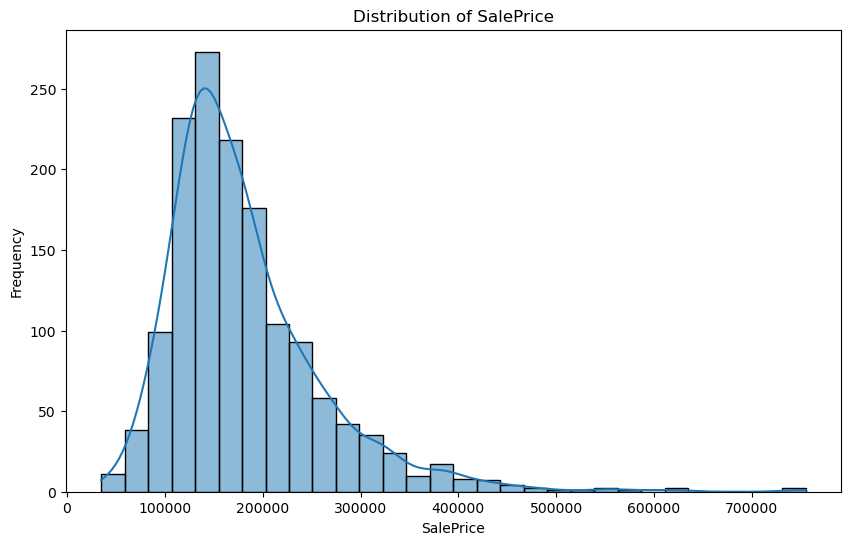

In [78]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(SalePrice, bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

In [79]:
# Calculate the correlation matrix with numerical features

# Drop non-numeric columns for correlation analysis
housing_num_data = housing_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
housing_num_data.corr()["SalePrice"].sort_values(ascending=False)



SalePrice        1.000000
GarageCars       0.640409
GarageArea       0.623431
GarageYrBlt      0.486362
WoodDeckSF       0.324413
OpenPorchSF      0.315856
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64

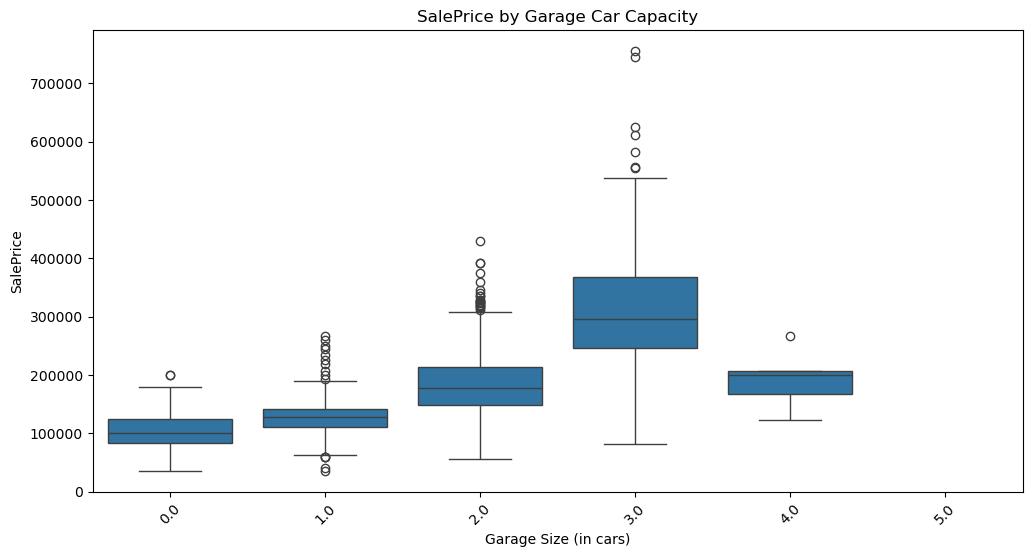

In [80]:
# Plot a boxplot of SalePrice against garage cars (Size of garage in car capacity)
plt.figure(figsize=(12, 6))
sns.boxplot(x="GarageCars", y="SalePrice", data=housing_data)
plt.title("SalePrice by Garage Car Capacity")
plt.xlabel("Garage Size (in cars)")
plt.ylabel("SalePrice")
plt.xticks(rotation=45)
plt.show()

In [90]:
# Run the Pearson correlation test to check the statistically significant correlation between SalePrice and GarageCars 

# Drop rows with missing values in GarageCars and SalePrice
cleaned_garageC_data = housing_data[["GarageCars", "SalePrice"]].dropna()

# Check for null values
print(cleaned_garageC_data.isnull().sum())

# Calculate the Pearson correlation coefficient
corr, p_value = pearsonr(cleaned_garageC_data["GarageCars"], cleaned_garageC_data["SalePrice"])

# Print the results
print(f"Pearson correlation coefficient: {corr: .3f}")
print(f"The p-value is: {p_value:.3f}")


GarageCars    0
SalePrice     0
dtype: int64
Pearson correlation coefficient:  0.640
The p-value is: 0.000


### Reflections ###

Cleaning the data: 

After checking for null values, I noticed a significant amount of data was missing for some features such as PoolQuality and FenceQuality which had over 2,000 missing variables. For the garage features, there were 159 missing variables.

A correlation matrix was then calculated to see which variables had the strongest relationship with house sale prices. From the correlation matrix, the garage features, GarageCars (0.64) and GarageArea (0.62) had the strongest positive correlation relative to other features. The correlation indicators showed a moderate correlation. So as the number of garage cars increases, the house price also moderately increases. 

Interestingly, other features such as, exterior, porch, pool, and sale information don't have significant correlation with the house sale prices.


1. What is the distribution of the Sales Price?

Answer: The sales price is right-skewed, showing that most housing prices fall between $100,000 to $250,000. The observed right-skew shows some utliers on the higer end that are above $500,000

2. How does the number of garage cars significantly influence house prices? 
    
    Answer: From the boxplot graph, there is an upward trend with the median sales price which increases for homes with 0 to 3 garages. For houses with 3-car garages, there is a significant jump of house prices. This category has the highest median prices ranging from $250,000 to $350,000 and the widest range in house sales price. This category also shows the most outliers, indicating that the most expensive houses generally have 3-car garages. It is also important to note that outliers also exist in the 1 and 2 car garage homes, indidcating that garage size in car capacity isn't the only variable that impacts the sale price of houses.  
    
    Additionally, I ran the Pearson coefficient test to determinr the statistical significance between both variables. With a p-value (0.000) less than 0.05, the relationship between the sale price of houses and the garage capacity (in cars) is statistically significant, indicating that houses with more garage capacity are associated with higher sale prices. 

